<a href="https://colab.research.google.com/github/MrocznyKapelusz/ML_basics/blob/master/ML_basics_4_Using_Convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convolutional NN improving Computer Vision Accuracy

Below there is code from part 2, when we used classic DNN to recognize types of clothing. 

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images / 255.0
test_images=test_images / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

test_loss = model.evaluate(test_images, test_labels)

#Now, with Convolutions added



In [ ]:
import tensorflow as tf
print(tf.__version__)
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True
callbacks=myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  # tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  # # tf.keras.layers.MaxPooling2D(2,2),
  # tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  # tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
# model.fit(training_images, training_labels, epochs=10,callbacks=[callbacks])
model.fit(training_images, training_labels, epochs=10)

test_loss = model.evaluate(test_images, test_labels)


2.2.0
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 2704)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               346240    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1290      
Total params: 347,690
Trainable params: 347,690
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4084 - accuracy: 0.8539
Epoc

The data has been reshaped, to fit into the convolutions - now it is a single 4D list, not thousands of 3D (28x28x1) lists.

**Conv2D(64,(3,3))** - creates 64 random 3x3 filters

**MaxPooling2D(2,2)** - Max pools the data in 2x2 parts

More epochs may result in *overfitting* - that is, specializing the NN too much - it might have a problem later, if it is focused too much on one dataset.





## Visualize Convolutions and Pooling

Thanks to the code below we can see the results of Convolutions and Pooling graphically. 

IndexError: ignored

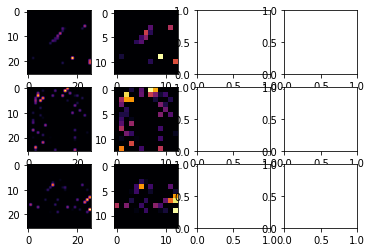

In [14]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=21
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

## Additional Excercises

1. The more filters in the Convolution layer, the more time-consuming and accurate the process is (preety self-explanatory).
2. Removing the final Convolution (and Pooling) speeded up the process and made it more accurate.
3. Adding another convolution (and Pooling) layer makes the model less accurate. Perhaps pooling such small image 2 times is overkill - the images are too small to distinguish any features)
4. The most successful model is the one with only one Convolutional layer, but with 10 epochs.

